In [1587]:
import pandas as pd 

contracts = pd.read_csv('contracts.csv', sep=',')
Batting_csv = pd.read_csv('kaggle/Batting.csv', sep=',')
Pitching_csv = pd.read_csv('kaggle/Pitching.csv', sep=',')
ops_leader = pd.read_csv('ops_leader.csv', sep=',')
era_leader = pd.read_csv('era_leader.csv', sep=',')



In [1588]:
def get_ops_leader(year):
    year_stats = ops_leader[ops_leader['Year'] == year]
    ops_leader_value = year_stats['OPS_Leader'].values[0]
    return ops_leader_value

In [1589]:
def get_era_leader(year):
    year_stats = era_leader[era_leader['Year'] == year]
    era_leader_value = year_stats['ERA_Leader'].values[0]
    return era_leader_value

get_era_leader(2019)





2.5

In [1590]:
average_batting = pd.read_csv('average_batting.csv', sep=',')
average_pitching = pd.read_csv('average_pitching.csv', sep=',')

def get_average_ops(year):
    year_stats = average_batting[average_batting['Year'] == year]
    return year_stats['OPS'].values[0]

def get_average_era(year):
    year_stats = average_pitching[average_pitching['Year'] == year]
    return year_stats['ERA'].values[0]


In [1591]:
batting_data = Batting_csv
batting_data['OBP'] = (batting_data['H'] + batting_data['BB'] + batting_data['HBP']) / (batting_data['AB'] + batting_data['BB'] + batting_data['HBP'] + batting_data['SF'])
batting_data['SLG'] = (batting_data['H'] - batting_data['2B'] - batting_data['3B'] - batting_data['HR'] + 2*batting_data['2B'] + 3*batting_data['3B'] + 4*batting_data['HR']) / batting_data['AB']
batting_data['OPS'] = batting_data['OBP'] + batting_data['SLG']



In [1592]:
players = (contracts['player'])

#current_player = players[len(players)-1]
#current_player = players[0]
#current_player = 'Manny Ramirez'
#current_player = 'Ken Griffey Jr'
current_player = 'Barry Bonds'

In [1593]:
first_year_of_contract= contracts.loc[contracts['player'] == current_player, 'year'].values[0]
first_year_of_contract



2002.0

In [1594]:
last_year_of_contract = first_year_of_contract + contracts.loc[contracts['player'] == current_player, 'length'].values[0]

In [1595]:
row = contracts[contracts['player'] == current_player]

position = ''
if(row['pos'].item() == 'p'):
    position = 'pitcher'

if(row['pos'].item() == 'h'):
    position = 'hitter'

position

'hitter'

In [1596]:
player_id = contracts.loc[contracts['player'] == current_player, 'player_id'].values[0]
player_id

'bondsba01'

In [1597]:
all_player_stats = batting_data[batting_data['playerID'] == player_id]
YEAR = all_player_stats['yearID'].values
YEAR

array([1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007])

In [1598]:
OPS = all_player_stats['OPS'].values
OPS

array([0.74634041, 0.82080193, 0.8587845 , 0.77689452, 0.97034431,
       0.92382013, 1.079561  , 1.13563694, 1.07321916, 1.00857116,
       1.07582778, 1.03096328, 1.04691404, 1.00630233, 1.1273682 ,
       1.37850562, 1.38070679, 1.27780886, 1.42173276, 1.07051282,
       0.99932018, 1.04478974])

In [1599]:
pitching_data = Pitching_csv[Pitching_csv['playerID'] == player_id]

ERA = pitching_data['ERA'].values
ERA

array([], dtype=float64)

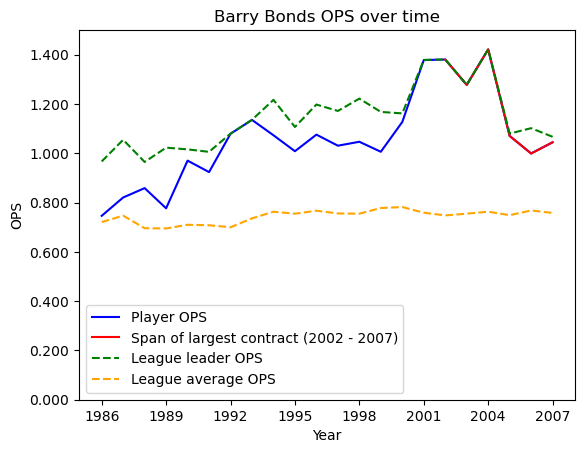

In [1600]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, MaxNLocator

plt.xlabel('Year')

if(position == 'pitcher'):
    plt.ylabel('ERA')
    plt.title(current_player + ' ERA over time')

    # pitcher graph
    x = YEAR
    y = ERA

    # Create a line graph for all years
    plt.plot(x, y, color='blue')

    mask = (x >= first_year_of_contract) & (x <= last_year_of_contract)

    # Create a line graph for the years 2000 - 2005
    plt.plot(x[mask], y[mask], color='red')

    # Set y-axis to have fixed values
    plt.ylim(0, 5)  # Change these values as needed

    # Format y-axis to have three decimal places
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

        # Ensure x-axis has integer values
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))



    era_average_over_span = []
    for year in x:
        era_average_over_span.append(get_average_era(year))

    plt.plot(x, era_average_over_span, color='orange', linestyle='--')
    # Display the graph
    plt.show()
if(position == 'hitter'):
    plt.ylabel('OPS')
    plt.title(current_player + ' OPS over time')

    # hitter graph
    x = YEAR
    y = OPS

    # Create a line graph for all years
    plt.plot(x, y, color='blue')

    # Create a line graph for the years 2000 - 2005
    mask = (x >= first_year_of_contract) & (x <= last_year_of_contract)
    plt.plot(x[mask], y[mask], color='red')

    # # Add horizontal lines
    # plt.axhline(1.000, color='green', linestyle='--')

    # Set y-axis to have fixed values
    plt.ylim(0, 1.5)  # Change these values as needed

    # Format y-axis to have three decimal places
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

    # Ensure x-axis has integer values
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))


    ops_leader_over_span = []
    for year in x:
        ops_leader_over_span.append(get_ops_leader(year))

    plt.plot(x, ops_leader_over_span, color='green', linestyle='--')

    ops_average_over_span = []
    for year in x:
        ops_average_over_span.append(get_average_ops(year))
    plt.plot(x, ops_average_over_span, color='orange', linestyle='--')


    plt.legend(['Player OPS',
                'Span of largest contract' + ' (' + str(int(first_year_of_contract)) + ' - ' + str(int(last_year_of_contract)) + ')',
                'League leader OPS',
                'League average OPS',
                ], loc='lower left')

    # Display the graph
    plt.show()